This notebook test run the DenseNet with CIFAR-10 data.The code is from [here](https://github.com/yesufeng/DeepLearningImplementations)

In [1]:
import os
import time
import json
import argparse
import numpy as np
import keras.backend as K
import pickle
from keras.callbacks import ModelCheckpoint
from rme.callbacks import Step
from densenet import DenseNet

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
import matplotlib.pylab as plt
%matplotlib inline 

In [10]:
X_train = np.load('./data/xtrain.npy')
y_train = np.load('./data/ytrain.npy')
X_test = np.load('./data/xtest.npy')
y_test = np.load('./data/ytest.npy')

In [11]:
nb_classes = len(np.unique(y_train))

In [25]:
img_dim = X_train.shape[1:]

In [13]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
# normalization
X = np.vstack((X_train, X_test))
for i in range(img_dim[2]):
    mean = np.mean(X[:, :, :, i])
    std = np.std(X[:, :, :, i])
    X_train[:, :, :, i] = (X_train[:, :, :, i] - mean) / std
    X_test[:, :, :, i] = (X_test[:, :, :, i] - mean) / std

In [15]:
# set default parameters
batch_size = 64
nb_epoch = 300
depth = 40
nb_dense_block = 3 
nb_filter = 16
growth_rate = 12
dropout_rate = 0.2
learning_rate = 0.1
weight_decay = 1e-4

In [16]:
model = DenseNet(10, img_dim, depth, nb_dense_block, growth_rate, 
                 nb_filter, dropout_rate, weight_decay)

In [17]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
initial_conv2D (Conv2D)          (None, 32, 32, 16)    432         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 32, 32, 16)    64          initial_conv2D[0][0]             
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 16)    0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [19]:
opt = SGD(lr=learning_rate, momentum=0.9, nesterov=True)

In [20]:
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=["accuracy"])

In [24]:
offset = 0
save_path = os.path.join('./log','densenet')
callbacks = []
callbacks.append(ModelCheckpoint(save_path + '.h5'))
steps = [nb_epoch/2 - offset, 3*nb_epoch/4 - offset]
schedule = Step(steps, [learning_rate, 0.1*learning_rate, 0.01*learning_rate], verbose=1)
callbacks.append(schedule)

#### Train on a small model, 2 blocks, depth is 7 with opt0 (adam)

In [175]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=2, validation_data=(X_test, Y_test),
              callbacks=callbacks, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Learning rate is 0.001
Epoch 1/30
9s - loss: 1.7199 - acc: 0.3834 - val_loss: 1.6631 - val_acc: 0.4016
Learning rate is 0.001
Epoch 2/30
7s - loss: 1.4928 - acc: 0.4762 - val_loss: 1.5980 - val_acc: 0.4382
Learning rate is 0.001
Epoch 3/30
7s - loss: 1.4090 - acc: 0.5112 - val_loss: 1.5678 - val_acc: 0.4640
Learning rate is 0.001
Epoch 4/30
7s - loss: 1.3612 - acc: 0.5298 - val_loss: 1.4945 - val_acc: 0.4712
Learning rate is 0.001
Epoch 5/30
7s - loss: 1.3296 - acc: 0.5422 - val_loss: 1.5257 - val_acc: 0.4627
Learning rate is 0.001
Epoch 6/30
7s - loss: 1.3049 - acc: 0.5503 - val_loss: 1.4203 - val_acc: 0.5127
Learning rate is 0.001
Epoch 7/30
7s - loss: 1.2864 - acc: 0.5568 - val_loss: 1.3523 - val_acc: 0.5335
Learning rate is 0.001
Epoch 8/30
7s - loss: 1.2738 - acc: 0.5611 - val_loss: 1.3599 - val_acc: 0.5385
Learning rate is 0.001
Epoch 9/30
7s - loss: 1.2580 - acc: 0.5696 - val_loss: 1.4439 - val_acc: 0.5183
Learning rate is 0.001


In [181]:
train_losses, train_accs, test_losses, test_accs = hist.history['loss'], hist.history['acc'], hist.history['val_loss'], hist.history['val_acc']

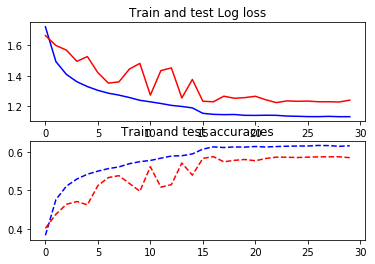

In [182]:
# plot the loss and accuracy for test and train data sets
fig, (ax1, ax2) = plt.subplots(nrows = 2);
ax1.plot(train_losses, 'b-');
ax1.plot(test_losses, 'r-');
ax1.set_title('Train and test Log loss');
ax2.plot(train_accs, 'b--');
ax2.plot(test_accs, 'r--');
ax2.set_title('Train and test accuracies');

## Train using the model config in the paper

In [ ]:
hist1 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=0, validation_data=(X_test, Y_test),
              callbacks=callbacks, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Learning rate is 0.1
Epoch 1/300
50000/50000 [==============================] - 145s - loss: 2.3019 - acc: 0.5124 - val_loss: 2.1855 - val_acc: 0.5639
Learning rate is 0.1
Epoch 2/300
50000/50000 [==============================] - 122s - loss: 1.6606 - acc: 0.6807 - val_loss: 1.9247 - val_acc: 0.6047
Learning rate is 0.1
Epoch 3/300
50000/50000 [==============================] - 123s - loss: 1.3546 - acc: 0.7396 - val_loss: 2.0569 - val_acc: 0.5335
Learning rate is 0.1
Epoch 4/300
50000/50000 [==============================] - 123s - loss: 1.1636 - acc: 0.7735 - val_loss: 1.9045 - val_acc: 0.5947
Learning rate is 0.1
Epoch 5/300
50000/50000 [==============================] - 123s - loss: 1.0283 - acc: 0.7944 - val_loss: 1.2495 - val_acc: 0.7239
Learning rate is 0.1
Epoch 6/300
50000/50000 [==============================] - 123s - loss: 0.9357 - acc: 0.8120 - val_loss: 1.4847 - val_acc: 0.6776
Learning rate is 0.1
Epoch 7/300
50000/50000

In [4]:
# this was run using python script test_cifar10.py, total time is around 10 hours and 20 mins
history = pickle.load(open('./log/cifar10_hist','rb'))

In [5]:
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

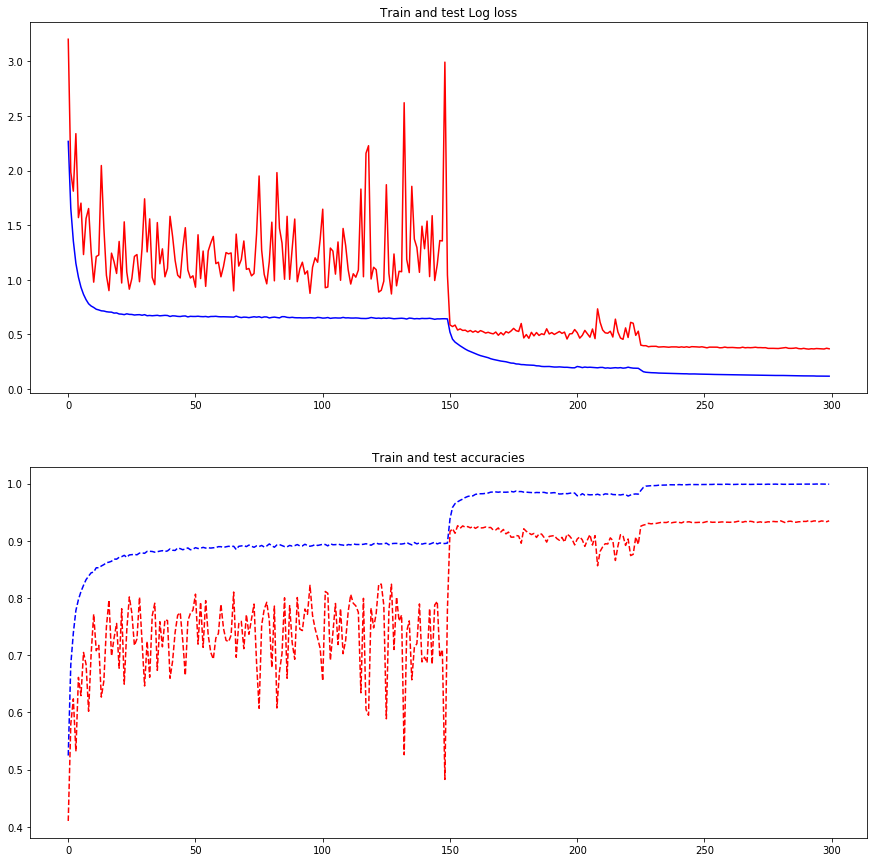

In [9]:
# plot the loss and accuracy for test and train data sets
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(15,15));
ax1.plot(history['loss'], 'b-');
ax1.plot(history['val_loss'], 'r-');
ax1.set_title('Train and test Log loss');
ax2.plot(history['acc'], 'b--');
ax2.plot(history['val_acc'], 'r--');
ax2.set_title('Train and test accuracies');